In [1]:
import pandas as pd
import numpy as np

# by 종두 Data 불러오기
ratings = pd.read_csv('ratings_3st.csv')
movies = pd.read_csv('movies_info_new_genres3.csv')


# 사용자 - 장르 DataFrame

In [ ]:
# Web Code 손보기

# 사용자 - rating DataFrame

In [4]:
# by 종두 유사 사용자 추출
movies = movies[movies['year'] > 2015]
movie_ratings = pd.merge(ratings, movies, on='title')
movie_ratings.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
movie_ratings_pivot = movie_ratings.pivot_table(values='rating', index='title', columns='user')
movie_ratings_pivot = movie_ratings_pivot.fillna(0)


In [6]:
movie_ratings

,user,title,rating,year,country,contents
0,날휘,레이디스 나잇,3.5,2017,미국,대학시절 베스트 프렌드였던 5명의 친구들이 처녀파티를 위해 10년만에 다시 뭉쳐 마...
9,지예,레이디스 나잇,2.5,2017,미국,대학시절 베스트 프렌드였던 5명의 친구들이 처녀파티를 위해 10년만에 다시 뭉쳐 마...
18,CHAEYOOE,레이디스 나잇,2.5,2017,미국,대학시절 베스트 프렌드였던 5명의 친구들이 처녀파티를 위해 10년만에 다시 뭉쳐 마...
27,이중석,레이디스 나잇,3.0,2017,미국,대학시절 베스트 프렌드였던 5명의 친구들이 처녀파티를 위해 10년만에 다시 뭉쳐 마...
36,YUNA,레이디스 나잇,3.5,2017,미국,대학시절 베스트 프렌드였던 5명의 친구들이 처녀파티를 위해 10년만에 다시 뭉쳐 마...
...,...,...,...,...,...,...
649219,영화봤슈,폴링 스노우,3.0,2016,"영국,캐나다",1959년 모스크바. 평생 조국을 위해 살아온 소련 정부 관료 ‘사샤’. 부모의 죽...
649220,영화봤슈,톰과 릴리: 그들만의 공간,2.5,2016,미국,160kg '톰'은 비만이라는 사회의 편견 속에 상처를 받고 돌아가신 할머니의 집 ...
649221,영화봤슈,키코리키: 황금모자의 비밀,2.5,2016,러시아,헬멧을 쓰면 인격이 서로 바뀌게 된다?! 키코리키 섬의 과학자가 “임프로버라이저”라...
649222,영화봤슈,포켓몬 더 무비 XY&Z-볼케니온 : 기계왕국의 비밀,3.0,2016,일본,"포켓몬 사상 최초 [불꽃], [물] 쌍방 타입을 가진 환상의 포켓몬 볼케니온의 등장..."


In [36]:
# pearson
pearson_sim = movie_ratings_pivot.corr(method='pearson')
pearson_sim

user,CHAEYOOE,Camellia,Cinephile,Doo,Free L,GEOGRAPHIC,Gayeong Kim,Hoony,JMovie-,Jay,...,최승호,춘경수지,치킨너겟지,코엔coen,쿠퍼쿠퍼,키스플럼,태양계,하인우,해인,헤실
user,,,,,,,,,,,,,,,,,,,,,
CHAEYOOE,1.000000,0.426778,0.453669,0.144089,0.256985,0.306352,0.159260,0.405711,0.324611,0.403611,...,0.139910,0.154070,0.190771,0.485642,0.242946,0.219499,0.440120,0.228580,0.370879,0.325655
Camellia,0.426778,1.000000,0.243674,0.240769,0.239334,0.203033,0.166876,0.350091,0.302601,0.295463,...,0.171395,0.169286,0.192027,0.290400,0.160794,0.212805,0.283952,0.240549,0.326218,0.279438
Cinephile,0.453669,0.243674,1.000000,0.016640,0.130819,0.221290,0.100691,0.317975,0.152955,0.352073,...,0.071717,0.041876,0.134248,0.332155,0.143839,0.108936,0.270557,0.166491,0.209269,0.261807
Doo,0.144089,0.240769,0.016640,1.000000,0.233062,0.111121,-0.023792,0.103763,0.262957,0.146060,...,-0.026164,0.250714,0.024965,0.201086,0.162414,0.232739,0.155844,0.217578,0.196541,0.138534
Free L,0.256985,0.239334,0.130819,0.233062,1.000000,0.188296,0.191096,0.264967,0.439181,0.298397,...,0.179067,0.337284,0.176758,0.341269,0.224406,0.339460,0.277367,0.315004,0.295792,0.326206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
키스플럼,0.219499,0.212805,0.108936,0.232739,0.339460,0.194930,0.215921,0.162088,0.374881,0.259647,...,0.252923,0.353139,0.319927,0.341521,0.308634,1.000000,0.322812,0.331125,0.228707,0.284988
태양계,0.440120,0.283952,0.270557,0.155844,0.277367,0.303657,0.204663,0.295815,0.363468,0.353021,...,0.192367,0.273858,0.305194,0.430830,0.282608,0.322812,1.000000,0.308184,0.344569,0.396737
하인우,0.228580,0.240549,0.166491,0.217578,0.315004,0.194289,0.289948,0.214800,0.318068,0.363120,...,0.226970,0.335812,0.378538,0.280809,0.188424,0.331125,0.308184,1.000000,0.242537,0.338509


(100, 2)


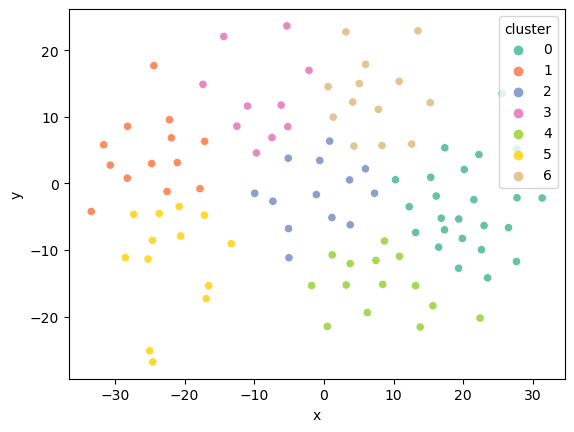

In [54]:
 # K-Means
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

tsne = TSNE(n_components=2, perplexity=10, learning_rate=100).fit_transform(movie_ratings_pivot.T)
print(tsne.shape)

name = movie_ratings.columns
x = tsne[:,0]
y = tsne[:,1]

KM = pd.DataFrame()
KM['x'] = x
KM['y'] = y
KM.index = name

kmeans = KMeans(n_clusters=7)
kmeans.fit(KM)

result_by_sklearn = KM.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()
sns.scatterplot(x="x", y="y", hue="cluster", data=result_by_sklearn, palette="Set2");

plt.show()


# main 알고리즘

In [43]:
# by 종두 
user_movie_dict = dict()
user_movie_keyword = dict()

movie_ratings_matrix = movie_ratings_pivot.T
for i in movie_ratings_matrix.index:
    movie_list = []

    avg = np.mean(movie_ratings_matrix.loc[i,:])
    li = movie_ratings_matrix.loc[i,:] > avg
    for j in range(len(li)):
        if li[j]:
            movie_list.append(li.index[j])

    user_movie_dict[i] = movie_list


In [ ]:
from konlpy.tag import Kkma

In [ ]:
import pandas as pd
from math import log10
import pandas as pd
import re
from math import log 
from konlpy.tag import Kkma
import os

In [ ]:
def f(t, d):
    return d.count(t)

def tf(t, d):
    return 0.5 + 0.5*f(t,d)/max([f(w,d) for w in d])

def idf(t, D):
    numerator = len(D)
    denominator = 1 + len([ True for d in D if t in d])
    return log10(numerator/denominator)

def tfidf(t, d, D):
    return tf(t,d)*idf(t, D)

def tokenizer(d):
    
    return d.split()

def tfidfScorer(D):
    D = [re.sub('[^A-Za-z0-9가-힣]', ' ', s) for s in D]
    tokenized_D = [tokenizer(d) for d in D]
    result = []
    for d in tokenized_D:
        result.append([(t, tfidf(t, d, tokenized_D)) for t in d])
    return result


In [85]:
movies.columns

Index(['title', 'year', 'country', 'contents', 'new_genres'], dtype='object')

In [97]:
movie__ = pd.read_csv('movies_info_new_genres3.csv')

a = pd.DataFrame(user_movie_dict['CHAEYOOE'], columns=['title'])

# movies 에서 a title이 있는 행만 가져와야 함
hos = pd.merge(a, movies, how='left', on='title')
hos.drop_duplicates(subset='title', keep='first', inplace=True, ignore_index=False)
hos

,title,year,country,contents,new_genres
0,#살아있다,2020,한국,원인불명 증세의 사람들의 공격에 통제불능에 빠진 도시. 영문도 모른 채 잠에서 깬 ...,정보없음
30,1917,2019,"미국,영국,인도,스페인,캐나다,중국","두 명의 병사, 하나의 미션\n그들이 싸워야 할 것은 적이 아니라 시간이었다!\n\...",드라마
69,1987,2017,한국,"“책상을 탁! 치니 억! 하고 죽었습니다”\n\n1987년 1월, 경찰 조사를 받던...",드라마
124,23 아이덴티티,2016,미국,23개의 인격을 가진 남자 ‘케빈’(제임스 맥어보이). 그는 언제 누가 등장할지 모...,공포
171,7호실,2017,한국,한 때 잘 나가다가 쇠락해 가는 상권에서 DVD방을 운영중인 '두식'(신하균)은 파...,블랙코미디
...,...,...,...,...,...
9111,호랑이보다 무서운 겨울손님,2017,한국,어느 날\n잊었던 그녀가 콜을 보냈다?!\n동물원에서 호랑이가 탈출하던 어느 겨울날...,멜로/로맨스
9113,혹성탈출: 종의 전쟁,2017,"미국,캐나다,뉴질랜드",전 세계에 퍼진 치명적인 바이러스 ‘시미안 플루’로 인해 유인원들은 나날이 진화하는...,액션
9152,후쿠오카,2019,한국,“여기 왜 오자고 했어?”\n\n책방 단골 ‘소담’ 때문에 불쑥 후쿠오카에 도착한 ...,드라마
9157,히든 피겨스,2016,미국,천부적인 수학 능력의 흑인 여성 '캐서린 존슨'(타라지 P.헨슨). NASA 흑인 ...,드라마


In [ ]:
kkma = Kkma()

for i, doc in enumerate(tfidfScorer(hos['contents'])):
        print('document{}'.format(i))
        doc = pd.DataFrame(doc, columns=['word', 'score'])
        doc['title'] = movie__.loc[i, '영화이름']
        doc = doc[['title', 'word', 'score']]
        doc.drop_duplicates(subset='word', keep='first', inplace=True, ignore_index=False, )
        doc = doc.sort_values(by='score', ascending=False)[:30]
        doc = doc.reset_index(); doc = doc.drop(labels='index', axis=1)
        
        cnt = 0
        for j in doc['word']:
            try:
                NN = kkma.nouns(j)[0]
                doc.loc[cnt, 'word'] = NN
            except IndexError:
                doc.drop(index=cnt, axis=0, inplace=True)
            cnt += 1
        user_movie_keyword[doc.title] = doc.word[:5]

In [ ]:
# by 종두 유사 사용자 추출
movies = movies[movies['year'] > 2015]
movie_ratings = pd.merge(ratings, movies, on='title')
movie_ratings.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
movie_ratings_pivot = movie_ratings.pivot_table(values='rating', index='title', columns='user')
movie_ratings_pivot = movie_ratings_pivot.fillna(0)


# 유사한 movie 추출

import pandas as pd
import numpy as np

In [ ]:
keyword = pd.read_csv('Keyword.csv')
keyword

In [ ]:
idx = keyword[keyword['score'] == 'score'].index
keyword.drop(index=idx, axis=0, inplace=True)
keyword['score'] = keyword['score'].astype(float)

In [ ]:
keyword_matrix = pd.pivot_table(keyword, values='score', index='title', columns='word', aggfunc='sum')
keyword_matrix.fillna(0, inplace=True)
keyword_matrix

In [ ]:
sim = keyword_matrix.T.corr(method='pearson')

In [ ]:
sim['히든 피겨스'].sort_values(ascending=False)

In [ ]:
sim_ = sim.copy()

In [ ]:
sim_index = sim_['히든 피겨스'].sort_values(ascending=False)[:15].index
sim_score = sim_['히든 피겨스'].sort_values(ascending=False)[:15]

sim_df = pd.DataFrame()
sim_df['title'] = sim_index
sim_df['score'] = sim_score.values

sim_df = sim_df[1:]
sim_df

In [ ]:
ratings = pd.read_csv('ratings_3st.csv')
avg = []

for i in sim_df['title']:
    avg.append(np.mean(ratings[ratings['title'] == i]['rating']))
print(avg)

In [ ]:
sim_df['rating'] = pd.Series(avg)
sim_df.fillna(0, inplace=True)
sim_df = sim_df.sort_values(by='rating', ascending=False)
sim_df[:5]